In [2]:
import random
import math
import matplotlib.pyplot as plt 
import numpy as np

This is an implementation of PSO that is very similar to the implementation I use in this project. The main difference is that this minimizes rather than maximizes a function. PSO is typically used to minimize so I chose that for this demonstration.

In [ ]:
# Implementation of PSO to MINIMIZE
# So the < will be flipped in the rest of the project
class particle:

    def __init__(self, 
                 parameters,      # Starting parameters
                 fitness_function # Function to minimize
                 ):
        self.parameters = parameters

        self.best_parameters = parameters.copy()

        self.velocity = [0.0] * len(parameters) # Set inital velocity to 0, let the swarm decide how to set inital velocities

        self.fitness_function = fitness_function

        self.fitness = fitness_function(parameters)

        self.best_fitness = self.fitness

    def __str__(self):
        return "Parameters:\n" + "\n".join(["           " + str(parameter) for parameter in self.parameters]) + "\n\nVelocity:\n" + "\n".join(["         " + str(velocity) for velocity in self.velocity])

    def step(self):

        # Move according to velocity
        for i in range(len(self.parameters)):
            self.parameters[i] += self.velocity[i]

        # Recalculate fitness and update best variables if necessary
        self.fitness = self.fitness_function(self.parameters)

        if self.fitness < self.best_fitness:
            self.best_fitness = self.fitness
            self.best_parameters = self.parameters.copy()

    def update_velocity(self, w, c1, c2, best_parameters):

        for i in range(len(self.velocity)):

            # Generate random amounts to tweak velocity by
            r1 = random.uniform(0.0, 1.0)
            r2 = random.uniform(0.0, 1.0)


            self.velocity[i] = ( w * self.velocity[i]                                  # Keep amount of previous velocity, w is called the inertia term
                               + r1*c1*(self.best_parameters[i] - self.parameters[i])  # Make velocity closer to the particles personal best
                               + r2*c2*(best_parameters[i] - self.parameters[i])       # Make velocity closer to swarm-wide best
                               )


class swarm:

    def __init__(self, 
                 particles, # Input particles
                 w,         # Inertia coefficient
                 c1,        # Cognitive coefficient, how much the particle likes its best position
                 c2         # Social coefficient, how much the particel likes the swarms best position
                 ):

        self.particles = particles

        self.best_parameters = particles[0].best_parameters
        self.best_fitness = particles[0].best_fitness
                                
        # Find best parameters and position across all input particles
        for particle in self.particles:
            if particle.best_fitness < self.best_fitness:
                self.best_fitness = particle.best_fitness
                self.best_parameters = particle.best_parameters.copy()

        self.w = w
        self.c1 = c1
        self.c2 = c2

        # Initialize particle velocities
        for particle in self.particles:
            particle.velocity = [random.uniform(-0.01,0.01) for i in range(len(particle.velocity))]



    def step(self):

        for particle in self.particles:

            particle.step()

            particle.update_velocity(self.w, self.c1, self.c2, self.best_parameters)

            # Check if updated particle has better fitness
            if particle.fitness < self.best_fitness:
                self.best_fitness = particle.fitness
                self.best_parameters = particle.best_parameters
    

Let's optimize some simple functions with PSO, here is a funtion with many local minima:

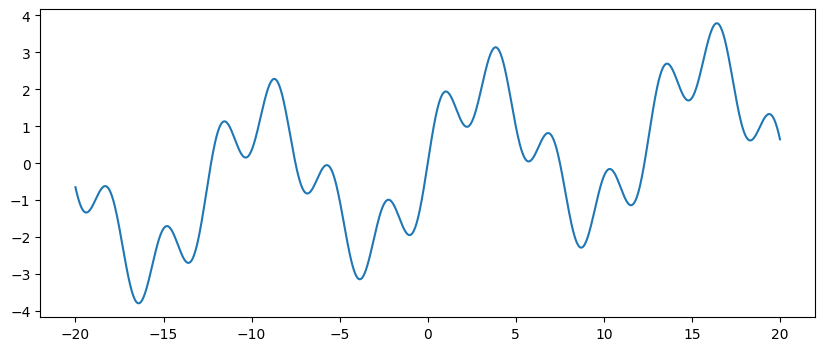

In [4]:
def basic_sin_fitness(parameters):
    return math.sin(2*parameters[0]) + 2*math.sin(parameters[0]/2) + math.sin(parameters[0]/14)

# Plot the function
xVals = np.linspace(-20.0, 20.0, 1000)
plt.figure(figsize=(10,4))
plt.plot(xVals, [basic_sin_fitness([x]) for x in xVals])
plt.show()

Now we can make a swarm of 50 particles.

In [5]:
sin_swarm = swarm([particle([random.uniform(-20.0, 20.0)], basic_sin_fitness) for _ in range(10)], 0.5, 2.0, 0.8)

Then use swarms .step() method to find the global minima.

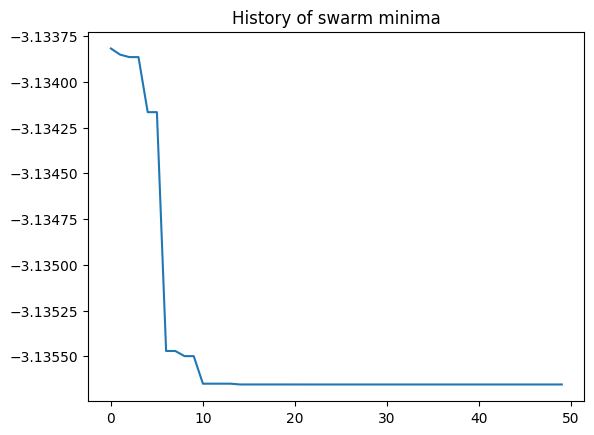

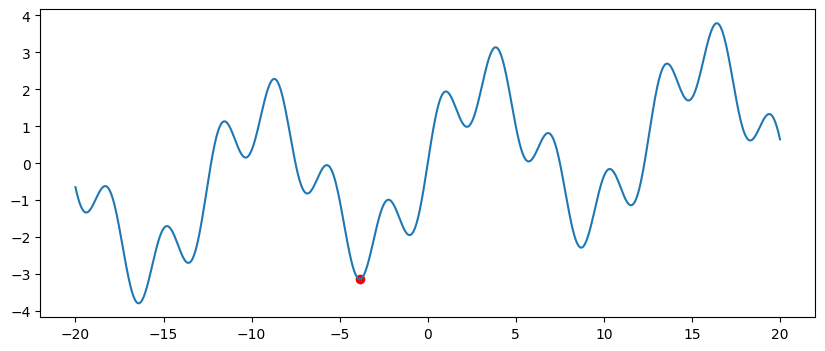

In [6]:
fitness_history = []
parameter_history = []

for _ in range(50):
    
    sin_swarm.step()

    fitness_history.append(sin_swarm.best_fitness)
    parameter_history.append(sin_swarm.best_parameters[0])

plt.plot(fitness_history)
plt.title("History of swarm minima")
plt.show()

xVals = np.linspace(-20.0, 20.0, 1000)
plt.figure(figsize=(10,4))
plt.plot(xVals, [basic_sin_fitness([x]) for x in xVals])
plt.scatter([parameter_history[-1]], [fitness_history[-1]], color="red")

plt.show()


Now, we will optimize a more complicated function. The ackley function is a function frequently used to test optimization algorithms. Is has many equally spaced local minima and one global minima at the origin. It can also be set to take inputs of any dimension.

In [7]:
def ackley_function(parameters, d):
    a = 20
    b = 0.2
    c = 6.28
    return 0 - a*math.exp(0-b*math.sqrt(sum([parameters[i]**2 for i in range(d)])/d)) \
            - math.exp(sum([math.cos(c*parameters[i]) for i in range(d)])/d) \
            + a + math.exp(1)

def ackley_3D_fitness(parameters):
    return ackley_function(parameters, 3)

def ackley_6D_fitness(parameters):
    return ackley_function(parameters, 6)

Run PSO on the Ackely function with three inputs.

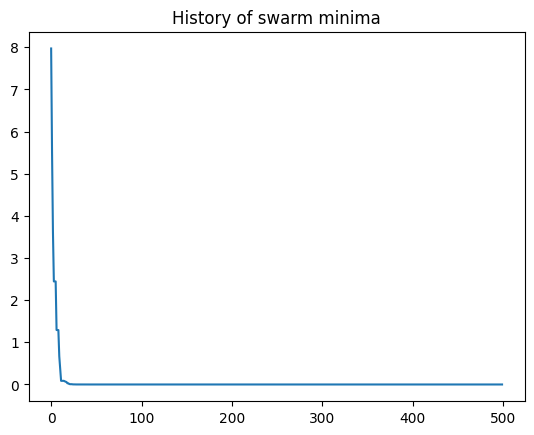

Final swarm parameters: 2.0129835812332435e-16, -3.367699905536664e-16, -3.485824443611262e-17


In [8]:
# Intialize swarm of 100 particles
ackley_swarm = swarm([particle([random.uniform(-20.0, 20.0) for _ in range(3)], ackley_3D_fitness) for _ in range(100)], 0.5, 2.0, 0.8)

fitness_history = []
parameter_history = []

for _ in range(500):

    ackley_swarm.step()

    fitness_history.append(ackley_swarm.best_fitness)
    parameter_history.append(ackley_swarm.best_parameters)


plt.plot(fitness_history)
plt.title("History of swarm minima")
plt.show()

print("Final swarm parameters: " + ", ".join([str(para) for para in parameter_history[-1]]))


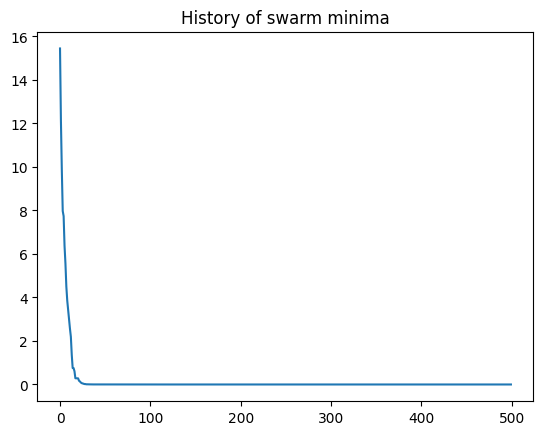

Final swarm parameters: 3.375178013107511e-16, -7.116316734065222e-17, -7.641482888657376e-17, 1.6814155492914937e-16, 3.3556218279820646e-17, -3.338838995585983e-16


In [9]:
# Intialize swarm of 100 particles
ackley_swarm = swarm([particle([random.uniform(-20.0, 20.0) for _ in range(6)], ackley_6D_fitness) for _ in range(100)], 0.5, 2.0, 0.8)

fitness_history = []
parameter_history = []

for _ in range(500):

    ackley_swarm.step()

    fitness_history.append(ackley_swarm.best_fitness)
    parameter_history.append(ackley_swarm.best_parameters)


plt.plot(fitness_history)
plt.title("History of swarm minima")
plt.show()

print("Final swarm parameters: " + ", ".join([str(para) for para in parameter_history[-1]]))

As you can see, the algorithm hones in on 0,0 very quickly. However, it struggles to get the precise optima. While PSO is great for finding global optima, a different algorithm (such as gradient descent) to narrow it down.